# Introduccion Redes Neuronales

## 1. Creacion de una red neuronal con Keras

In [1]:
from keras import Sequential
from keras import layers

In [4]:
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(5,)))
model.add(layers.Dense(5, activation='linear'))
model.add(layers.Dense(3, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.utils import plot_model

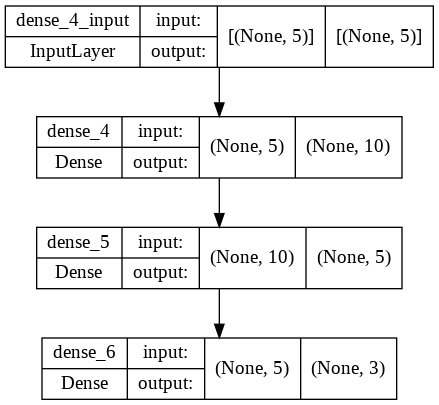

In [8]:
plot_model(model, to_file='model.png', show_shapes=True)

## 2. Dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
n = 1000
X = np.zeros(shape=(n,2))
Y = np.zeros(shape=(n,))

In [11]:
mid = int(n/2)
t = 12.0 * np.random.uniform(0.0,1.0, size=(mid,1))
X[0:mid,:] = t*np.hstack((-np.cos(t), np.sin(t))) + np.random.uniform(0.0,2.0, size=(mid,2))
Y[0:mid] = 0
X[mid:,:] = t*np.hstack((np.cos(t), -np.sin(t))) + np.random.uniform(0.0,2.0, size=(mid,2))
Y[mid:] = 1

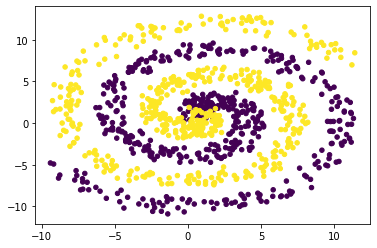

In [15]:
plt.scatter(X[:,0],X[:,1],20.0,Y)

In [16]:
# Escalamos
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [17]:
# Reordenar
from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state=1)

## 3. Solucion con SVM

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,Y)

SVC()

In [19]:
Yp = svc.predict(X)

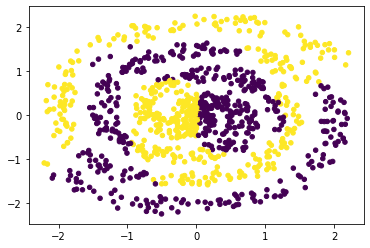

In [20]:
plt.scatter(X[:,0],X[:,1],20.0,Yp)

## 4. Solucion con MLP

In [40]:
model = Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(2,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [41]:
# Compila
model.compile('adam','categorical_crossentropy',['acc'])

In [36]:
# Damos la forma a Y
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Ytrain = lb.fit_transform(Y)

In [37]:
Ytrain[:3]

array([[1],
       [1],
       [0]])

In [39]:
# Nos apoyamos en Keras para la codificacion de Y
from tensorflow.keras.utils import to_categorical

In [43]:
# Entrenamos
model.fit(X,to_categorical(Y),batch_size=64, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5931 - acc: 0.6270
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5851 - acc: 0.6240
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5838 - acc: 0.6570
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5723 - acc: 0.6340
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5700 - acc: 0.6750
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5569 - acc: 0.6480
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5443 - acc: 0.6680
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5311 - acc: 0.6910
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5159 - acc: 0.7080
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5007 - acc: 0.7330
Epoch 11/100
16/16 [==============================] - 0s 4m

In [47]:
Yp = model.predict(X)
Yp = np.argmax(Yp,1)

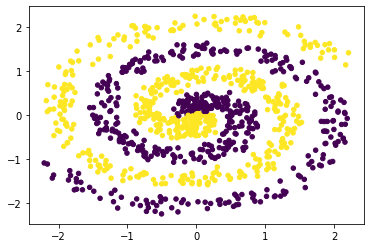

In [49]:
plt.scatter(X[:,0],X[:,1],20.0,Yp)